# <p align="center">**📊 Customer Churn Data Analysis and Preprocessing 📊**</p>


<p align="center">
  <img src="https://thebrainpoint.com/wp-content/uploads/2025/10/Predictive-Analytics-Helps-Reduce-Customer-Churn.jpg" width="800"/>
</p>

# **My Information**

### ‎‧₊**˚✿[My Name]✿˚** : **[Mohamed Reda Ramadan Khamis]**
### ‎‧₊**˚✿[My Phone Number]✿˚** : **[01554725661]**

🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 

<h1 align="center">
  <span style="color:yellow; background:purple; padding:4px 8px; border-radius:8px; font-weight:bold;">
    📊 Data Analysis of the Project
  </span>
</h1>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Set Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

In [2]:
# Load Data
df = pd.read_csv(r"C:\Users\PC\Desktop\machine learning\Data Science Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Number of rows : 7043
# Number of columns : 21
df.shape

(7043, 21)

In [5]:
# SeniorCitizen column must be converted to Categorical
# TotalCharges must be converted to Numerical (float)   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert TotalCharges to numeric (handling empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  

In [7]:
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100     # (missing_data / df.shape[0] * 100
missing_df = pd.DataFrame({'Missing Values': missing_data,'Percentage (%)': missing_percent}).T
missing_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,0.0
Percentage (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156183,0.0


In [10]:
# Fill missing TotalCharges with 0 (new customers)
df['TotalCharges'].fillna(0, inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [14]:
df['SeniorCitizen']

0        no
1        no
2        no
3        no
4        no
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: SeniorCitizen, Length: 7043, dtype: object

<span style="color:black; background-color:yellow; font-size:25px; font-weight:bold">
    🔍 Analyzing the target variable (Churn Column)
</span>

In [15]:
#from the given pie chart we can conclude that 26.54% of our customers have churned out. 
# Churn Distribution
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('📊 Churn Distribution', '🎯 Churn Percentage'),
    specs=[[{'type': 'pie'}, {'type': 'bar'}]]
)

# Pie Chart
churn_counts = df['Churn'].value_counts()
fig.add_trace(
    go.Pie(labels=churn_counts.index, 
           values=churn_counts.values,
           hole=0.4,
           marker=dict(colors=['#4ECDC4', '#FF6B6B']),
           textinfo='label+percent',
           hoverinfo='label+value+percent'),
    row=1, col=1
)

# Bar Chart with percentages
churn_rate = (df['Churn'].value_counts(normalize=True) * 100).round(2)
fig.add_trace(
    go.Bar(x=churn_rate.index,
           y=churn_rate.values,
           text=churn_rate.values,
           textposition='auto',
           marker_color=['#4ECDC4', '#FF6B6B']),
    row=1, col=2
)

fig.update_layout(
    title_text="Customer Churn Analysis",
    showlegend=True,
    height=400
)
fig.show()

In [16]:
# imbalance Data
print(f"Churn Rate: {(df['Churn'] == 'Yes').mean()*100:.2f}%")
print(f"Total Customers: {len(df)}")
print(f"Customers Churned: {(df['Churn'] == 'Yes').sum()}")
print(f"Customers Stayed: {(df['Churn'] == 'No').sum()}")

Churn Rate: 26.54%
Total Customers: 7043
Customers Churned: 1869
Customers Stayed: 5174


<span style="color:black; background-color:yellow; font-size:25px; font-weight:bold">
    🔍 Analysis of Numerical Columns
</span>

In [17]:
# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Tenure Distribution', 'Monthly Charges', 'Total Charges',
                    'Tenure vs Churn', 'Monthly Charges vs Churn', 'Total Charges vs Churn')
)

# Distribution plots
for i, col in enumerate(numerical_cols):
    fig.add_trace(
        go.Histogram(x=df[col], 
                     nbinsx=30,
                     name=col,
                     marker_color=colors[i]),
        row=1, col=i+1
    )

# Box plots by Churn
for i, col in enumerate(numerical_cols):
    fig.add_trace(
        go.Box(y=df[col],
               x=df['Churn'],
               name=col,
               marker_color=colors[i],
               boxmean='sd'),
        row=2, col=i+1
    )

fig.update_layout(
    title_text="📈 Numerical Variables Analysis",
    showlegend=False,
    height=600
)
fig.show()

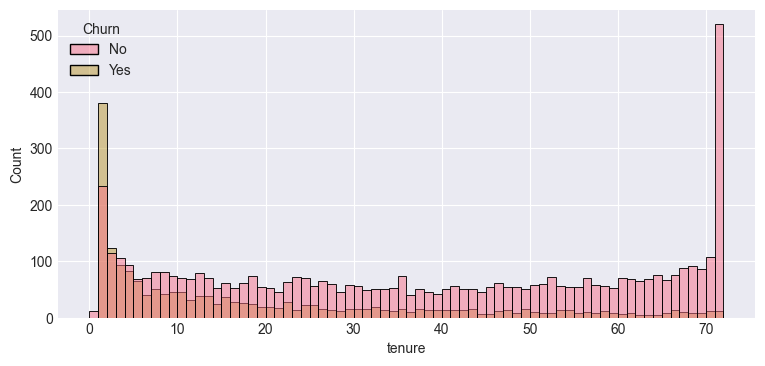

In [18]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
📊 Key Insights & Findings from the Analysis
</span>
</div>

### **people who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months  have churned.**


<span style="color:black; background-color:yellow; font-size:25px; font-weight:bold">
    🔍 Analysis of Categorical Columns
</span>

In [19]:
# Define categorical columns (excluding ID and target)
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Function to plot categorical variables
def plot_categorical_churn(col, title):
    # Create cross-tab
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    
    fig = go.Figure(data=[
        go.Bar(name='No Churn', x=ct.index, y=ct['No'], marker_color='#4ECDC4'),
        go.Bar(name='Churn', x=ct.index, y=ct['Yes'], marker_color='#FF6B6B')
    ])
    
    fig.update_layout(
        title=f'{title} vs Churn Rate',
        barmode='stack',
        xaxis_title=title,
        yaxis_title='Percentage (%)',
        height=400,
        showlegend=True
    )
    
    # Add percentage labels
    for i in range(len(ct)):
        fig.add_annotation(
            x=ct.index[i],
            y=ct.iloc[i]['Yes'] + 2,
            text=f"{ct.iloc[i]['Yes']:.1f}%",
            showarrow=False,
            font=dict(size=10)
        )
    
    return fig

# Plot key categorical variables
key_cols = ['Contract', 'InternetService', 'PaymentMethod', 
            'OnlineSecurity', 'TechSupport', 'SeniorCitizen']

for col in key_cols:
    fig = plot_categorical_churn(col, col)
    fig.show()
    
    # Print insights
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    max_churn = ct['Yes'].idxmax()
    min_churn = ct['Yes'].idxmin()
    
    print(f"\n {col} Insights:")
    print(f"   Highest Churn: {max_churn} ({ct.loc[max_churn, 'Yes']:.1f}%)")
    print(f"   Lowest Churn: {min_churn} ({ct.loc[min_churn, 'Yes']:.1f}%)")



 Contract Insights:
   Highest Churn: Month-to-month (42.7%)
   Lowest Churn: Two year (2.8%)



 InternetService Insights:
   Highest Churn: Fiber optic (41.9%)
   Lowest Churn: No (7.4%)



 PaymentMethod Insights:
   Highest Churn: Electronic check (45.3%)
   Lowest Churn: Credit card (automatic) (15.2%)



 OnlineSecurity Insights:
   Highest Churn: No (41.8%)
   Lowest Churn: No internet service (7.4%)



 TechSupport Insights:
   Highest Churn: No (41.6%)
   Lowest Churn: No internet service (7.4%)



 SeniorCitizen Insights:
   Highest Churn: yes (41.7%)
   Lowest Churn: no (23.6%)


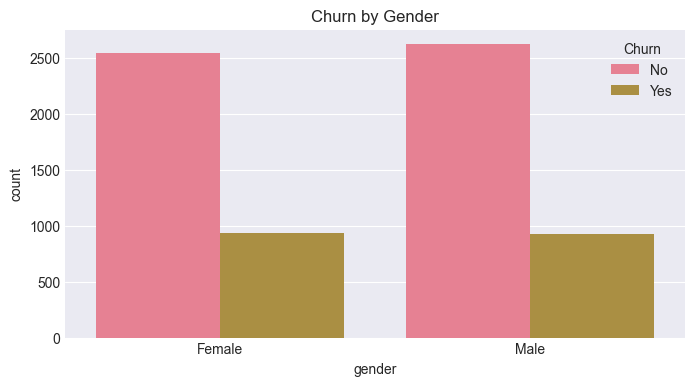

In [20]:
plt.figure(figsize = (8,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

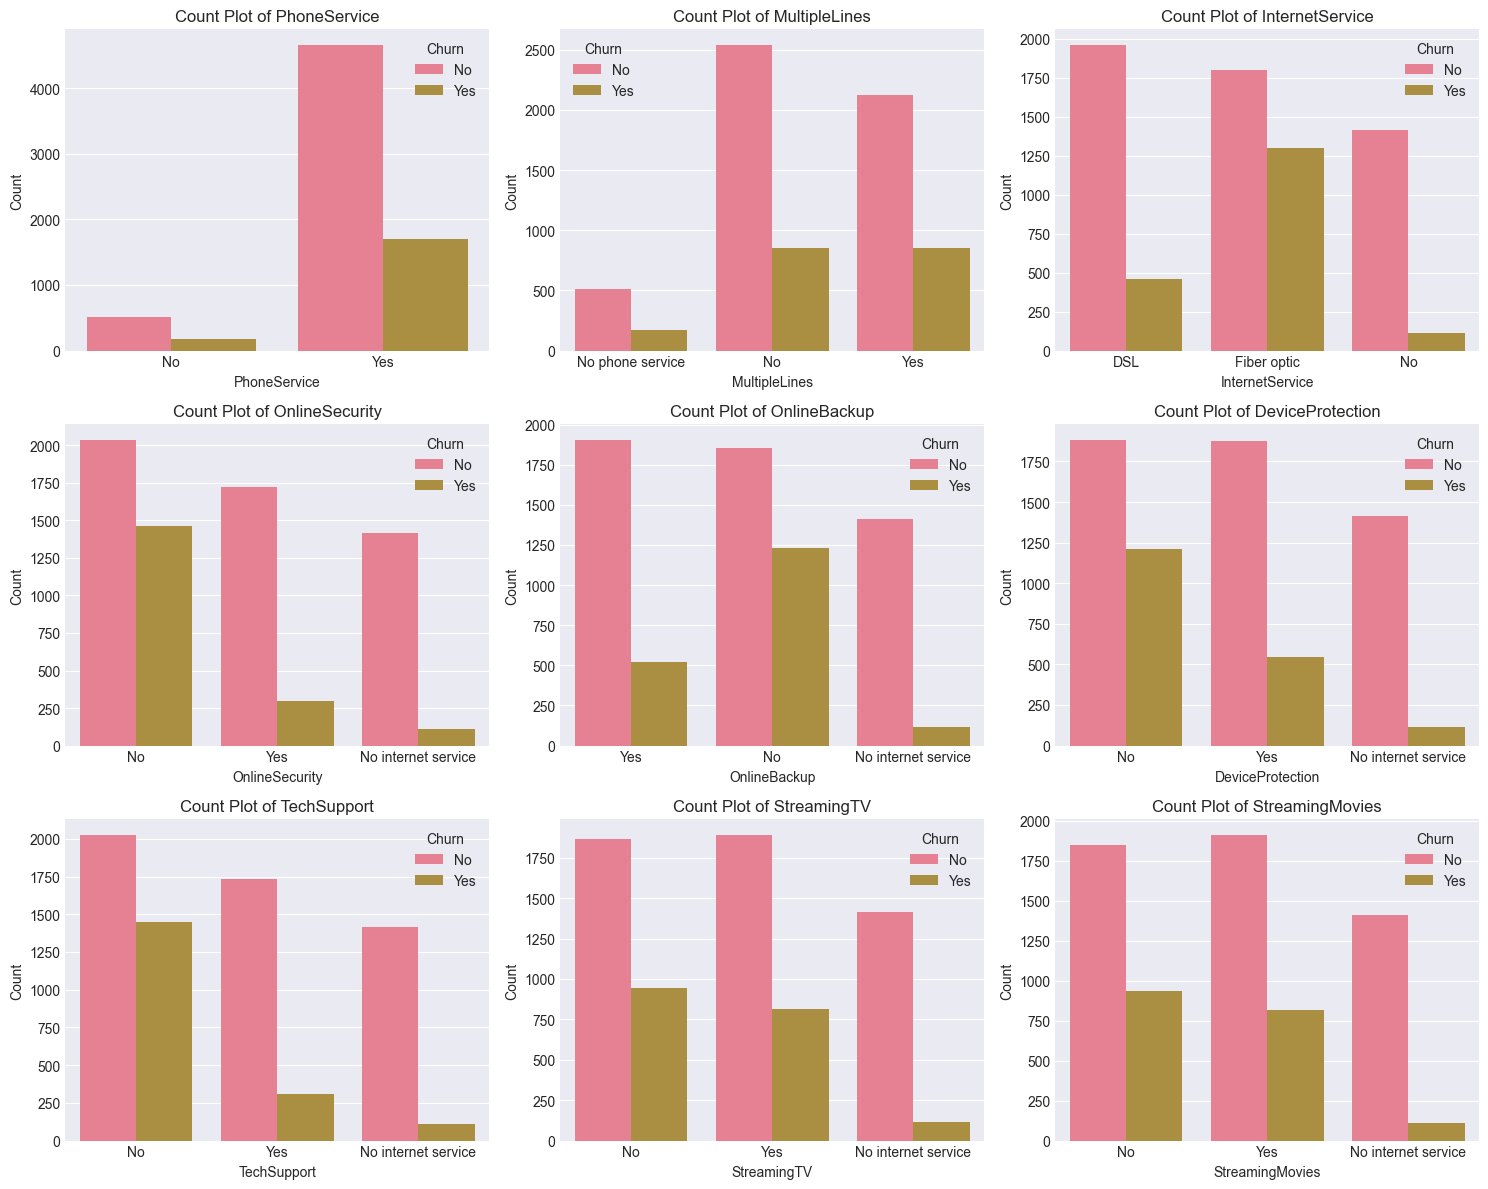

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
📊 Key Insights & Findings from the Analysis
</span>
</div>

### **The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.**

<span style="color:black; background-color:yellow; font-size:25px; font-weight:bold">
    🔍 Correlation Analysis
</span> 

In [22]:
# Encode categorical variables for correlation
df_encoded = df.copy()

# Encode target
df_encoded['Churn_encoded'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Select and encode key categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_to_encode = ['Contract', 'InternetService', 'PaymentMethod', 
                        'OnlineSecurity', 'TechSupport', 'PaperlessBilling']

for col in categorical_to_encode:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])

# Correlation matrix
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded',
            'Contract_encoded', 'InternetService_encoded', 
            'PaymentMethod_encoded', 'OnlineSecurity_encoded']

corr_matrix = df_encoded[corr_cols].corr()

# Plot correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=np.round(corr_matrix.values, 2),
    texttemplate='%{text}',
    textfont={"size": 10}
))

fig.update_layout(
    title=' Correlation Heatmap',
    height=600,
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()

print("Top Correlations with Churn:")
churn_corr = corr_matrix['Churn_encoded'].sort_values(ascending=False)
for feature, corr in churn_corr.items():
    if feature != 'Churn_encoded' and abs(corr) > 0.1:
        print(f"  {feature}: {corr:.3f}")


Top Correlations with Churn:
  MonthlyCharges: 0.193
  PaymentMethod_encoded: 0.107
  TotalCharges: -0.198
  OnlineSecurity_encoded: -0.289
  tenure: -0.352
  Contract_encoded: -0.397


<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
📊 Key Insights & Findings from the Analysis
</span>
</div>

<p align="center">
  <img src="insight_30.jpeg" width="500">
</p>


<h1 align="center">
  <span style="color:yellow; background:purple; padding:4px 8px; border-radius:8px; font-weight:bold;">
    📊 Data Preprocessing of the Project
  </span>
</h1>

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Drop Unnecessary Column  
</span>

In [23]:
df_model = df.copy()

In [24]:
# Drop customerID columns
df_model.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [25]:
df_model.drop("customerID",axis=1,inplace=True)

In [26]:
df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Numbers of Female nearest equal to Numbers of Male
df_model.groupby("gender")["Churn"].count()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
📊 Key Insights & Findings from the Analysis
</span>
</div>

### Why Gender Was Not Removed

Although the correlation between `gender` and `Churn` was found to be very low, the feature was intentionally kept in the dataset for the following reasons:

- **Non-linear models can still use it**  
  Tree-based models (Decision Tree, Random Forest, XGBoost) can capture complex interactions between gender and other variables such as `SeniorCitizen`, `Contract`, or `MonthlyCharges`, even if the direct correlation is weak.

- **Low risk, low cost feature**  
  `Gender` is a binary variable with no multicollinearity issues and very low noise. Keeping it does not degrade model performance.

- **Model-driven feature selection**  
  Modern machine learning models automatically assign near-zero importance to uninformative features, making manual removal unnecessary.

- **Fairness and auditability**  
  Keeping demographic features allows post-model analysis to check for potential bias or unfair treatment across groups.

**Conclusion:**  
Gender was kept as a potential interaction feature, while relying mainly on behavioral and service-based variables for churn prediction.


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Check Data types 
</span>

In [28]:
dtypes = df_model.dtypes
N_unique = df_model.nunique()
pd.DataFrame({"Number of Dtyes of each column" : dtypes , "Number of unique" : N_unique}).T

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Number of Dtyes of each column,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
Number of unique,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6531,2


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Handle Null Values 
</span>

In [29]:
null = df_model.isnull().sum()
ratio = null / df_model.shape[0]
pd.DataFrame({"Number of Nulls Values" : null , "ratio" : ratio}).T

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Number of Nulls Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Handle Outliers 
</span>

In [30]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

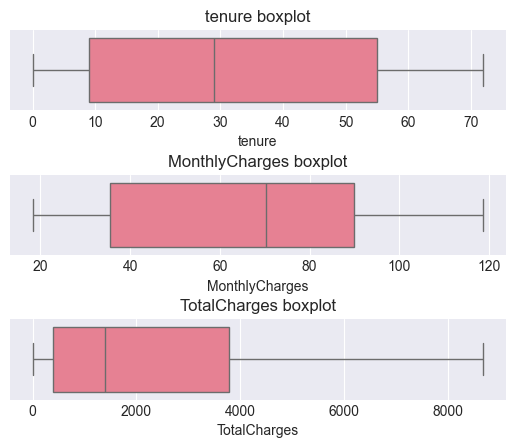

In [31]:
plt.Figure(figsize=(8,4))
for i , col in enumerate(numerical_cols):
    plt.subplot(3 , 1 , i+1)
    sns.boxplot(df[col],orient="h",)
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
plt.show()

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Check Duplicates
</span>

In [32]:
df_model.duplicated().sum()

np.int64(22)

In [33]:
# before drop all duplicates rows
df_model.shape[0]

7043

In [34]:
df_model.drop_duplicates(inplace=True)

In [35]:
# After drop all duplicates rows
df_model.shape[0]

7021

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Handle 'No internet service' and 'No phone service' With using Label Encoding(map('Yes': 1, 'No': 0))
</span>

In [36]:
services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in services:
    df_model[col] = df_model[col].replace({'No internet service': 'No', 
                                          'No phone service': 'No'})
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
📊 Key Insights & Findings from the Analysis
</span>
</div>

<p align="center">
  <img src="insight_31.jpeg" width="500">
</p>


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Encoding
</span>

In [37]:
from sklearn.preprocessing import LabelEncoder

- Applied **Label Encoding** to binary categorical features (`gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`), as each feature contains exactly two classes, enabling efficient numerical representation for machine learning models.


In [38]:
le = LabelEncoder()

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',"SeniorCitizen"]

for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [39]:
df_model[binary_cols]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,0
3,1,0,0,0,0,0
4,0,0,0,1,1,0
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


- Applied **One-Hot Encoding** to nominal categorical features (`InternetService`, `PaymentMethod`) to properly handle multiple categorical classes and prevent unintended ordinal relationships during model training.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
nominal_cols = ['InternetService', 'PaymentMethod']
ohe = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

encoded_cols = ohe.fit_transform(df_model[nominal_cols])

In [42]:
encoded_df = pd.DataFrame(
    encoded_cols,
    columns=ohe.get_feature_names_out(nominal_cols),
    index=df_model.index
)

In [43]:
df_model = pd.concat([df_model.drop(columns=nominal_cols), encoded_df], axis=1)

- Encoded the `Contract` column using **Ordinal Encoding** with a real-world temporal hierarchy (`Month-to-month` < `One year` < `Two year`) to preserve contractual duration relationships and improve model interpretability.

In [44]:
contract_map = {
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
}

df_model["Contract"] = df_model["Contract"].map(contract_map)

- Encode target variable

In [45]:
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

In [46]:
df_model["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7021, dtype: int64

## Note on Scaling Before Saving the Data

After applying **encoding** to all categorical features in the `Telco_Preprocessing` dataset, I decided **not to apply scaling** before saving the data. The rationale is as follows:

- The models that will be used later are mostly **tree-based models**, such as:
  - Decision Tree
  - Random Forest
  - Gradient Boosting (XGBoost, LightGBM, CatBoost)
- **Tree-based models do not depend on the scale of feature values** because they split the data based on value thresholds, not distances or directions.
- Therefore, **applying scaling would not provide any practical benefit** and keeping the original values preserves interpretability and feature importance.

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Save Processed Data
</span>


In [47]:
# Save processed data to use in any Notebook
df_model.to_csv('telco_churn_processed.csv', index=False)
print("Processed data saved as 'telco_churn_processed.csv'")

Processed data saved as 'telco_churn_processed.csv'


In [48]:
df_processed_data = pd.read_csv("telco_churn_processed.csv")
df_processed_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,1.0,0.0,0.0,1.0,0.0


In [49]:
df_model.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

<div style="text-align: center;">
  <h1><b>🏁 Data Preprocessing on telco_churn Datasets Completed Successfully</b></h1>
</div>